four models and train it on the IMDB Reviews dataset with full word encoding. These use different layers after the embedding namely Flatten, LSTM, GRU, and Conv1D, compare the performance and see which architecture might be best for this particular dataset.

In [14]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2YUUO6/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2YUUO6/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete2YUUO6/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [16]:
train_data, test_data = imdb['train'], imdb['test']

# Initialize sentences and labels lists
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# Loop over all training examples and save the sentences and labels
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [17]:
# Parameters
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [19]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Model 1: Flatten

In [21]:
# Parameters
embedding_dim = 16
dense_dim = 6

# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_flatten.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_6 (Dense)             (None, 6)                 11526     
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171533 (670.05 KB)
Trainable params: 171533 (670.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_flatten = model_flatten.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 23s 114ms/step - loss: 0.6110 - accuracy: 0.6589 - val_loss: 0.3968 - val_accuracy: 0.8333
Epoch 2/10
196/196 [==============================] - 11s 55ms/step - loss: 0.3181 - accuracy: 0.8685 - val_loss: 0.3301 - val_accuracy: 0.8559
Epoch 3/10
196/196 [==============================] - 5s 26ms/step - loss: 0.2044 - accuracy: 0.9273 - val_loss: 0.3546 - val_accuracy: 0.8472
Epoch 4/10
196/196 [==============================] - 6s 30ms/step - loss: 0.1210 - accuracy: 0.9678 - val_loss: 0.3863 - val_accuracy: 0.8443
Epoch 5/10
196/196 [==============================] - 3s 18ms/step - loss: 0.0587 - accuracy: 0.9911 - val_loss: 0.4372 - val_accuracy: 0.8365
Epoch 6/10
196/196 [==============================] - 3s 16ms/step - loss: 0.0261 - accuracy: 0.9979 - val_loss: 0.4801 - val_accuracy: 0.8354
Epoch 7/10
196/196 [==============================] - 3s 16ms/step - loss: 0.0126 - accuracy: 0.9996 - val_loss: 0.5167 - val_accuracy: 0.8

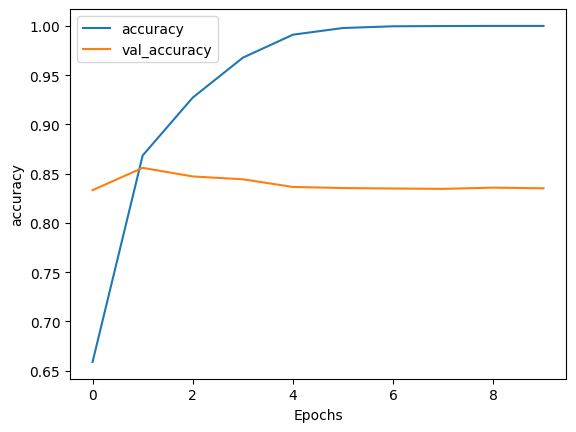

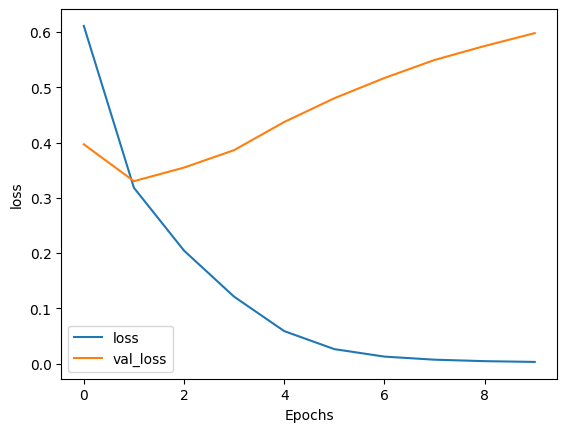

In [23]:
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

# LSTM

In [ ]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Epoch 1/10
196/196 [==============================] - 22s 86ms/step - loss: 0.5255 - accuracy: 0.7161 - val_loss: 0.3820 - val_accuracy: 0.8324
Epoch 2/10
196/196 [==============================] - 10s 50ms/step - loss: 0.3035 - accuracy: 0.8790 - val_loss: 0.3447 - val_accuracy: 0.8486
Epoch 3/10
196/196 [==============================] - 7s 33ms/step - loss: 0.2389 - accuracy: 0.9098 - val_loss: 0.3656 - val_accuracy: 0.8425
Epoch 4/10
196/196 [==============================] - 6s 32ms/step - loss: 0.2023 - accuracy: 0.9254 - val_loss: 0.4189 - val_accuracy: 0.8344
Epoch 5/10
196/196 [==============================] - 5s 26ms/step - loss: 0.1737 - accuracy: 0.9398 - val_loss: 0.4689 - val_accuracy: 0.8245
Epoch 6/10
196/196 [==============================] - 5s 27ms/step - loss: 0.1482 - accuracy: 0.9489 - val_loss: 0.4933 - val_accuracy: 0.8204
Epoch 7/10
196/196 [==============================] - 7s 36ms/step - loss: 0.1182 - accuracy: 0.9612 - val_loss: 0.6311 - val_accuracy: 0.81

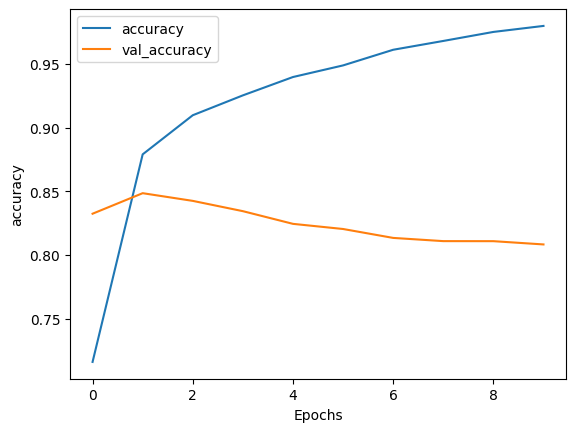

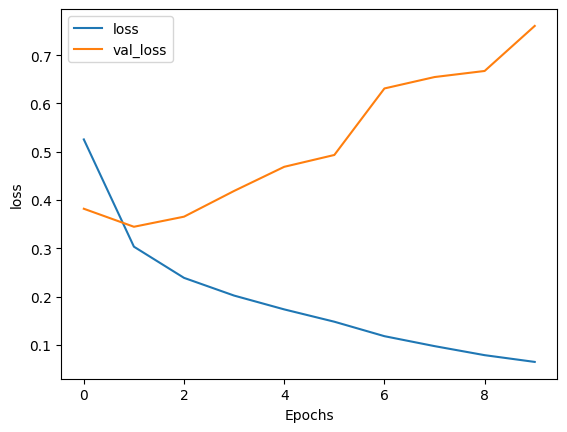

In [25]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))
# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

# GRU

In [26]:
import tensorflow as tf

# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 6)                 390       
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 169997 (664.05 KB)
Trainable params: 169997 (664.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))
# Plot the accuracy and loss history


Epoch 1/10
196/196 [==============================] - 21s 87ms/step - loss: 0.6173 - accuracy: 0.6514 - val_loss: 0.4364 - val_accuracy: 0.8065
Epoch 2/10
196/196 [==============================] - 11s 56ms/step - loss: 0.3485 - accuracy: 0.8551 - val_loss: 0.3544 - val_accuracy: 0.8458
Epoch 3/10
196/196 [==============================] - 8s 41ms/step - loss: 0.2633 - accuracy: 0.8984 - val_loss: 0.3578 - val_accuracy: 0.8454
Epoch 4/10
196/196 [==============================] - 5s 26ms/step - loss: 0.2219 - accuracy: 0.9189 - val_loss: 0.4065 - val_accuracy: 0.8394
Epoch 5/10
196/196 [==============================] - 6s 32ms/step - loss: 0.1901 - accuracy: 0.9330 - val_loss: 0.4400 - val_accuracy: 0.8329
Epoch 6/10
196/196 [==============================] - 5s 25ms/step - loss: 0.1727 - accuracy: 0.9402 - val_loss: 0.4704 - val_accuracy: 0.8280
Epoch 7/10
196/196 [==============================] - 4s 22ms/step - loss: 0.1535 - accuracy: 0.9490 - val_loss: 0.4779 - val_accuracy: 0.82

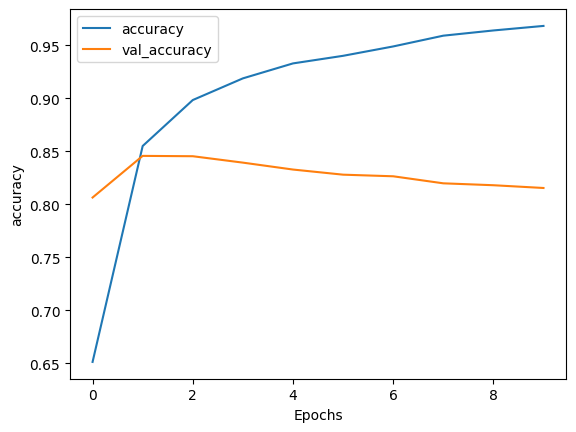

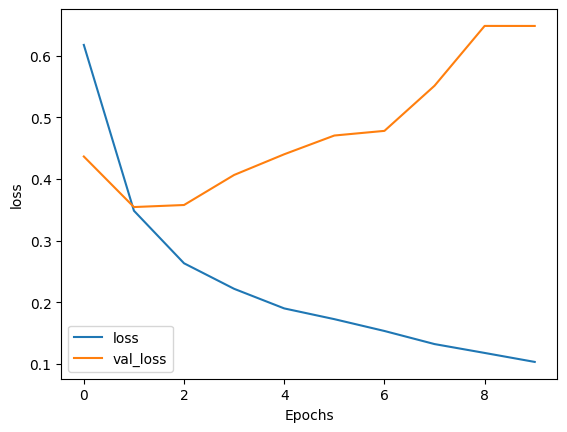

In [28]:
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

# Convolution

In [29]:
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_4 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_12 (Dense)            (None, 6)                 774       
                                                                 
 dense_13 (Dense)            (None, 1)                 7         
                                                                 
Total params: 171149 (668.55 KB)
Trainable params: 171149 (668.55 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [30]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_conv = model_conv.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))
# Plot the accuracy and loss history


Epoch 1/10
196/196 [==============================] - 17s 75ms/step - loss: 0.5217 - accuracy: 0.7364 - val_loss: 0.3564 - val_accuracy: 0.8467
Epoch 2/10
196/196 [==============================] - 10s 51ms/step - loss: 0.2945 - accuracy: 0.8772 - val_loss: 0.3505 - val_accuracy: 0.8485
Epoch 3/10
196/196 [==============================] - 5s 28ms/step - loss: 0.2383 - accuracy: 0.9058 - val_loss: 0.3861 - val_accuracy: 0.8363
Epoch 4/10
196/196 [==============================] - 5s 22ms/step - loss: 0.2031 - accuracy: 0.9250 - val_loss: 0.4242 - val_accuracy: 0.8326
Epoch 5/10
196/196 [==============================] - 4s 19ms/step - loss: 0.1782 - accuracy: 0.9346 - val_loss: 0.4574 - val_accuracy: 0.8291
Epoch 6/10
196/196 [==============================] - 3s 14ms/step - loss: 0.1567 - accuracy: 0.9438 - val_loss: 0.5033 - val_accuracy: 0.8226
Epoch 7/10
196/196 [==============================] - 2s 10ms/step - loss: 0.1381 - accuracy: 0.9507 - val_loss: 0.5502 - val_accuracy: 0.81

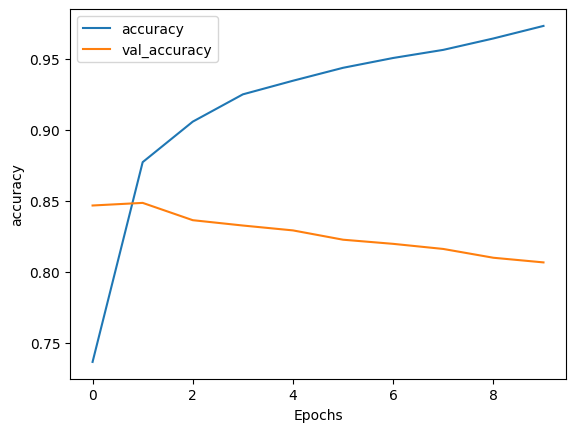

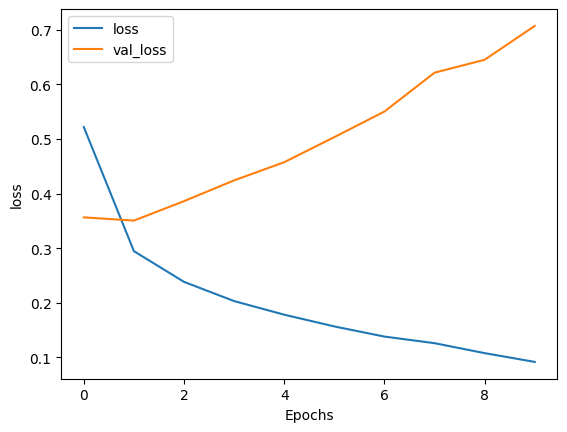

In [31]:
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')